In [3]:
!pip install pandas_datareader

from pandas_datareader import data as pdr
from tqdm import tqdm, trange
stock_list = ['KBANK','SCB','BBL','KTB']
stock_data = []
stock_name = []

for quote in tqdm(stock_list):
    try:
        stock_data.append(pdr.get_data_yahoo(f'{quote}.BK', start='2005-01-01', end='2020-05-02'))
        stock_name.append(quote)
    except:
        print("Error:", sys.exc_info()[0])
        print("Description:", sys.exc_info()[1])

100%|██████████| 4/4 [00:03<00:00,  1.30it/s]


In [4]:
stock_data[0].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-04,55.5,53.0,53.0,55.5,9938400.0,38.019039
2005-01-05,56.5,54.5,55.5,55.0,13069800.0,37.676517
2005-01-06,56.0,54.5,55.0,56.0,11543400.0,38.361553
2005-01-07,57.0,55.5,56.5,56.5,11629900.0,38.704052
2005-01-10,56.5,55.0,56.0,56.5,6644700.0,38.704052


In [5]:
from matplotlib import pyplot
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
 
# multivariate time series preprocessing
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True,feat_name=None):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{feat_name[j]}(t-{i})' for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'{feat_name[j]}(t)' for j in range(n_vars)]
        else:
            names += [f'{feat_name[j]}(t+{i})' for j in range(n_vars)]
    
    # concatonating
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with nulls
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# using just adjusted close, dropping close column
stock_data[0] = stock_data[0].drop('Close',axis=1)
dataset = stock_data[0]
values = dataset.values
values = values.astype('float32')

# scaling data to a (0,1) interval
min_dict = dict()
max_dict = dict()
for col in dataset.columns:
  min_dict[col] = dataset[col].min()
  max_dict[col] = dataset[col].max()
  dataset[col] = (dataset[col] - dataset[col].min())/(dataset[col].max()-dataset[col].min())
  
# dropping unncessary columns
reframed = series_to_supervised(dataset.values, 30, 3,feat_name=stock_data[0].columns)
reframed.drop(['High(t)','High(t+1)','High(t+2)','Low(t)','Low(t+1)','Low(t+2)','Open(t)','Open(t+1)','Open(t+2)','Volume(t)','Volume(t+1)',\
               'Volume(t+2)'],axis=1,inplace=True)

In [6]:
reframed.head()

,High(t-30),Low(t-30),Open(t-30),Volume(t-30),Adj Close(t-30),High(t-29),Low(t-29),Open(t-29),Volume(t-29),Adj Close(t-29),High(t-28),Low(t-28),Open(t-28),Volume(t-28),Adj Close(t-28),High(t-27),Low(t-27),Open(t-27),Volume(t-27),Adj Close(t-27),High(t-26),Low(t-26),Open(t-26),Volume(t-26),Adj Close(t-26),High(t-25),Low(t-25),Open(t-25),Volume(t-25),Adj Close(t-25),High(t-24),Low(t-24),Open(t-24),Volume(t-24),Adj Close(t-24),High(t-23),Low(t-23),Open(t-23),Volume(t-23),Adj Close(t-23),High(t-22),Low(t-22),Open(t-22),Volume(t-22),Adj Close(t-22),High(t-21),Low(t-21),Open(t-21),Volume(t-21),Adj Close(t-21),High(t-20),Low(t-20),Open(t-20),Volume(t-20),Adj Close(t-20),High(t-19),Low(t-19),Open(t-19),Volume(t-19),Adj Close(t-19),High(t-18),Low(t-18),Open(t-18),Volume(t-18),Adj Close(t-18),High(t-17),Low(t-17),Open(t-17),Volume(t-17),Adj Close(t-17),High(t-16),Low(t-16),Open(t-16),Volume(t-16),Adj Close(t-16),High(t-15),Low(t-15),Open(t-15),Volume(t-15),Adj Close(t-15),High(t-14),Low(t-14),Open(t-14),Volume(t-14),Adj Close(t-14),High(t-13),Low(t-13),Open(t-13),Volume(t-13),Adj Close(t-13),High(t-12),Low(t-12),Open(t-12),Volume(t-12),Adj Close(t-12),High(t-11),Low(t-11),Open(t-11),Volume(t-11),Adj Close(t-11),High(t-10),Low(t-10),Open(t-10),Volume(t-10),Adj Close(t-10),High(t-9),Low(t-9),Open(t-9),Volume(t-9),Adj Close(t-9),High(t-8),Low(t-8),Open(t-8),Volume(t-8),Adj Close(t-8),High(t-7),Low(t-7),Open(t-7),Volume(t-7),Adj Close(t-7),High(t-6),Low(t-6),Open(t-6),Volume(t-6),Adj Close(t-6),High(t-5),Low(t-5),Open(t-5),Volume(t-5),Adj Close(t-5),High(t-4),Low(t-4),Open(t-4),Volume(t-4),Adj Close(t-4),High(t-3),Low(t-3),Open(t-3),Volume(t-3),Adj Close(t-3),High(t-2),Low(t-2),Open(t-2),Volume(t-2),Adj Close(t-2),High(t-1),Low(t-1),Open(t-1),Volume(t-1),Adj Close(t-1),Adj Close(t),Adj Close(t+1),Adj Close(t+2)
30,0.072019,0.068884,0.066038,0.229506,0.044905,0.076741,0.076010,0.077830,0.301819,0.043124,0.074380,0.076010,0.075472,0.266570,0.046686,0.079103,0.080760,0.082547,0.268567,0.048467,0.076741,0.078385,0.080189,0.153445,0.048467,0.074380,0.076010,0.080189,0.201993,0.043124,0.072019,0.078385,0.077830,0.077511,0.043124,0.074380,0.078385,0.075472,0.244932,0.046686,0.076741,0.080760,0.080189,0.141485,0.048467,0.083825,0.085511,0.084906,0.314212,0.053811,0.083825,0.085511,0.089623,0.161449,0.052030,0.086187,0.085511,0.089623,0.252435,0.052030,0.079103,0.083135,0.082547,0.153135,0.050249,0.076741,0.078385,0.080189,0.227402,0.044905,0.072019,0.073634,0.077830,0.200201,0.041342,0.076741,0.073634,0.073113,0.114755,0.048467,0.076741,0.080760,0.082547,0.078386,0.046686,0.076741,0.080760,0.082547,0.154558,0.044905,0.07438,0.078385,0.075472,0.049391,0.044905,0.074380,0.076010,0.080189,0.118660,0.043124,0.074380,0.078385,0.075472,0.074389,0.046686,0.074380,0.078385,0.080189,0.113534,0.044905,0.074380,0.078385,0.077830,0.101507,0.044905,0.081464,0.083135,0.080189,0.350542,0.048467,0.081464,0.085511,0.087264,0.165915,0.052030,0.086187,0.087886,0.089623,0.198093,0.053811,0.086187,0.090261,0.091981,0.072856,0.053811,0.083825,0.090261,0.089623,0.049051,0.053811,0.083825,0.083135,0.089623,0.125509,0.048467,0.083825,0.085511,0.084906,0.119457,0.053811,0.052030,0.050249,0.046686
31,0.076741,0.076010,0.077830,0.301819,0.043124,0.074380,0.076010,0.075472,0.266570,0.046686,0.079103,0.080760,0.082547,0.268567,0.048467,0.076741,0.078385,0.080189,0.153445,0.048467,0.074380,0.076010,0.080189,0.201993,0.043124,0.072019,0.078385,0.077830,0.077511,0.043124,0.074380,0.078385,0.075472,0.244932,0.046686,0.076741,0.080760,0.080189,0.141485,0.048467,0.083825,0.085511,0.084906,0.314212,0.053811,0.083825,0.085511,0.089623,0.161449,0.052030,0.086187,0.085511,0.089623,0.252435,0.052030,0.079103,0.083135,0.082547,0.153135,0.050249,0.076741,0.078385,0.080189,0.227402,0.044905,0.072019,0.073634,0.077830,0.200201,0.041342,0.076741,0.073634,0.073113,0.114755,0.048467,0.076741,0.080760,0.082547,0.078386,0.046686,0.076741,0.080760,0.082547,0.154558,0.044905,0.074380,0.078385,0.0754

In [0]:
# split into train and test sets
values = reframed.values
n_train_percent = 0.9
split = int(values.shape[0]*0.9)
train = values[:split, :]
test = values[split:, :]

In [0]:
date_reframed = dataset.index[reframed.index]
date_train = date_reframed[:split]
date_test = date_reframed[split:]

In [0]:
# split into input and outputs
train_X, train_y = train[:, :-3], train[:, -3:]
test_X, test_y = test[:, :-3], test[:, -3:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [10]:
train_X

array([[[0.07201889, 0.06888361, 0.06603774, ..., 0.08490566,
         0.11945686, 0.05381141]],

       [[0.07674144, 0.0760095 , 0.07783019, ..., 0.08962264,
         0.1046659 , 0.05203008]],

       [[0.07438017, 0.0760095 , 0.0754717 , ..., 0.08962264,
         0.15987622, 0.05024877]],

       ...,

       [[0.81582054, 0.81472684, 0.80660377, ..., 0.80188679,
         0.13204014, 0.8633086 ]],

       [[0.81582054, 0.81472684, 0.81603774, ..., 0.80188679,
         0.14447793, 0.8633086 ]],

       [[0.81109799, 0.80047506, 0.81132075, ..., 0.80660377,
         0.13653862, 0.85358484]]])

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Using TensorFlow backend.


Train on 3360 samples, validate on 374 samples
Epoch 1/100
 - 1s - loss: 0.0611 - val_loss: 0.1268
Epoch 2/100
 - 0s - loss: 0.0634 - val_loss: 0.0790
Epoch 3/100
 - 0s - loss: 0.0473 - val_loss: 0.0781
Epoch 4/100
 - 0s - loss: 0.0386 - val_loss: 0.0665
Epoch 5/100
 - 0s - loss: 0.0398 - val_loss: 0.0680
Epoch 6/100
 - 0s - loss: 0.0346 - val_loss: 0.0683
Epoch 7/100
 - 0s - loss: 0.0309 - val_loss: 0.0658
Epoch 8/100
 - 0s - loss: 0.0325 - val_loss: 0.0534
Epoch 9/100
 - 0s - loss: 0.0310 - val_loss: 0.0466
Epoch 10/100
 - 0s - loss: 0.0343 - val_loss: 0.0409
Epoch 11/100
 - 0s - loss: 0.0346 - val_loss: 0.0518
Epoch 12/100
 - 0s - loss: 0.0318 - val_loss: 0.0456
Epoch 13/100
 - 0s - loss: 0.0337 - val_loss: 0.0409
Epoch 14/100
 - 0s - loss: 0.0396 - val_loss: 0.0498
Epoch 15/100
 - 0s - loss: 0.0453 - val_loss: 0.0521
Epoch 16/100
 - 0s - loss: 0.0378 - val_loss: 0.0441
Epoch 17/100
 - 0s - loss: 0.0401 - val_loss: 0.0490
Epoch 18/100
 - 0s - loss: 0.0369 - val_loss: 0.0531
Epoch 19

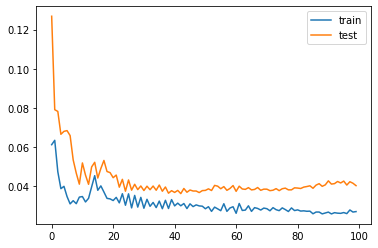

In [12]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [0]:
inv_yhat = yhat*(max_dict['Adj Close']-min_dict['Adj Close'])+min_dict['Adj Close']
inv_y = test_y*(max_dict['Adj Close']-min_dict['Adj Close'])+min_dict['Adj Close']

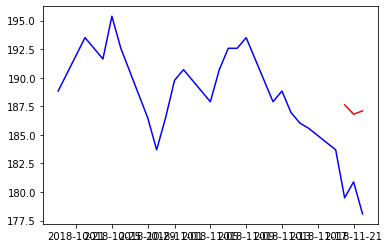

In [16]:
import numpy as np
# also show the price of previous 30 days + datetime
idx = np.random.randint(0,len(yhat-3))
if idx <30:
  date_actual = date_test[:idx+3]
else:
  date_actual = date_test[idx-30:idx+3]

_=pyplot.plot(date_actual,inv_y[max(0,idx-30):idx+3,0],'b')
_=pyplot.plot(date_test[idx:idx+3],inv_yhat[idx],'r')